## Visual check for the created errors

In [ ]:
import os
import random

import cv2
from PIL import Image, ImageDraw, ImageFont
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from copy import deepcopy

In [2]:
images_folder_val = "bdd100k/images/100k/val"
json_labels_val = "bdd100k/labels/bdd100k_labels_images_val.json"

json_labels_err = "bdd100k/labels/bdd100k_w_errors.json"
json_error_ids = "bdd100k/labels/error_ids_dict.json"

In [3]:
with open(json_labels_val, 'r') as file:
    data_val = json.load(file)

with open(json_labels_err, 'r') as file:
    data_err = json.load(file)

with open(json_error_ids, 'r') as file:
    error_ids_dict = json.load(file)

In [5]:
def create_set_of_all_error_ids(error_ids_dict):
    '''
    Convert dictionary with repeated ids into a set of ids with all types of errors.
    '''
    all_error_ids = set()
    for ids in error_ids_dict.values():
        all_error_ids.update(ids)
    return all_error_ids

error_ids_dict = create_set_of_all_error_ids(error_ids_dict)
len(error_ids_dict)

71144

In [6]:
def draw_bounding_boxes_erroneous(image_path, labels_correct, labels_error, error_ids_dict):
    with Image.open(image_path) as img:
        draw = ImageDraw.Draw(img)

        skipped_ids = []
        # Draw correct labels in green
        for label in labels_correct:
            if label["id"] in error_ids_dict:
                skipped_ids.append(label["id"])
                continue
            box = label['box2d']
            draw.rectangle([box['x1'], box['y1'], box['x2'], box['y2']], outline="green", width=3)

        # Draw error labels in red
        for label in labels_error:
            if label["id"] in error_ids_dict:  # Only draw if it's marked as an error
                skipped_ids.remove(label["id"])
                box = label['box2d']
                draw.rectangle([box['x1'], box['y1'], box['x2'], box['y2']], outline="red", width=2) # Maybe use dashed lines
                
        for label in labels_correct:
            if label["id"] in skipped_ids:
                box = label['box2d']
                draw.rectangle([box['x1'], box['y1'], box['x2'], box['y2']], outline="red", width=2) # Maybe use dashed lines
        return img

def plot_image_w_labels_erroneous(image_folder, image_name, labels_correct, labels_error, error_ids_dict):
    image_path = os.path.join(image_folder, image_name)
    img = draw_bounding_boxes_erroneous(image_path, labels_correct, labels_error, error_ids_dict)
    plt.figure(figsize=(15, 12))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image: {image_name}")
    plt.show()

In [13]:
image_id = 2
print(data_val[image_id]["name"])
print(data_val[image_id]["labels"][4])
print(data_err[image_id]["labels"][4])

b1c81faa-c80764c5.jpg
{'id': '42', 'attributes': {'occluded': True, 'truncated': False, 'trafficLightColor': 'NA'}, 'category': 'car', 'box2d': {'x1': 501.49618, 'y1': 271.746697, 'x2': 524.852922, 'y2': 287.91675}}
{'id': '42', 'attributes': {'occluded': True, 'truncated': False, 'trafficLightColor': 'NA'}, 'category': 'truck', 'box2d': {'x1': 501.49618, 'y1': 271.746697, 'x2': 524.852922, 'y2': 287.91675}}


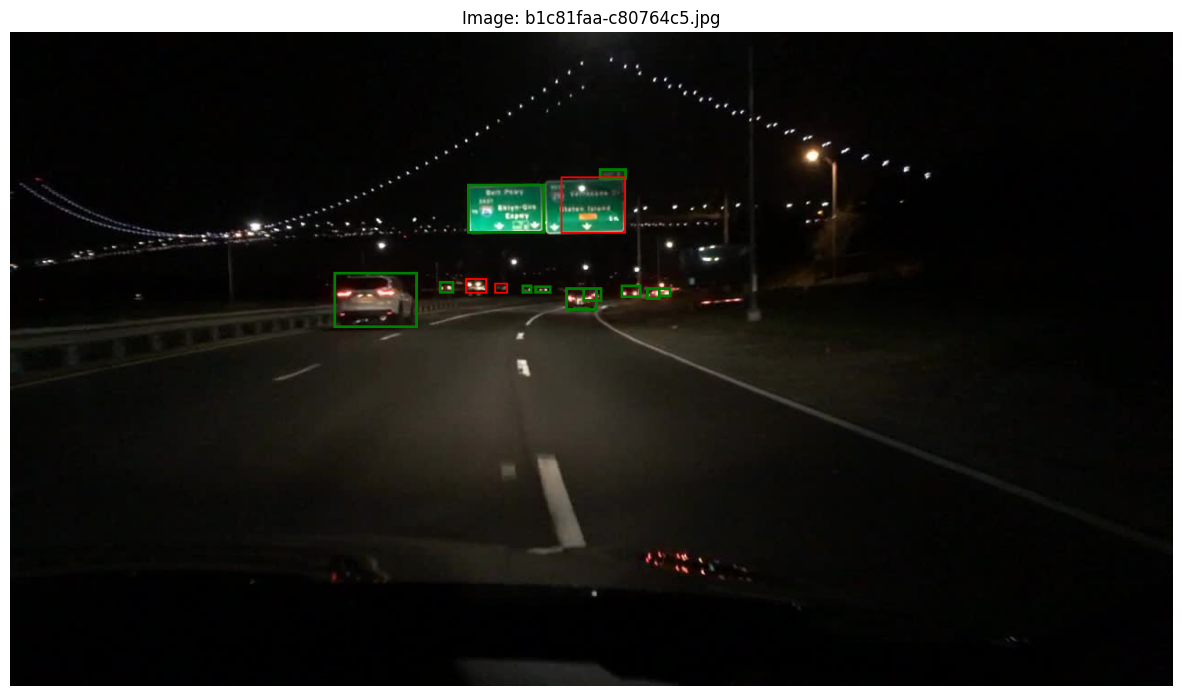

In [14]:
plot_image_w_labels_erroneous(images_folder_val, data_val[image_id]["name"], data_val[image_id]["labels"], data_err[image_id]["labels"], error_ids_dict)